The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input train_y is (8758, 1, 1)
--------------------------------------------------
The shape of the input train_y is (4322, 1, 1)
--------------------------------------------------
(2161, 1, 10) (2161, 1, 1) (2161, 1, 10) (2161, 1, 1)
train_X.shape, train_y.shape, test_x.shape, test_y.shape
(52548, 1, 10) (52548, 1, 1) (2161, 1, 10) (2161, 1, 1)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 100)         │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 1, 100)         │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 50)          │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1, 1)           │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,601 (260.16 KB)

 Trainable params: 66,601 (260.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2766/2766 - 13s - 5ms/step - loss: 27.2490 - mae: 3.4671 - val_loss: 23.5511 - val_mae: 3.3952
Epoch 2/50
2766/2766 - 9s - 3ms/step - loss: 18.0196 - mae: 3.0525 - val_loss: 22.3466 - val_mae: 3.3339
Epoch 3/50
2766/2766 - 9s - 3ms/step - loss: 16.5572 - mae: 2.9290 - val_loss: 23.0814 - val_mae: 3.3445
Epoch 4/50
2766/2766 - 9s - 3ms/step - loss: 15.5530 - mae: 2.8451 - val_loss: 20.9712 - val_mae: 3.1140
Epoch 5/50
2766/2766 - 9s - 3ms/step - loss: 14.9476 - mae: 2.7884 - val_loss: 19.1228 - val_mae: 3.0239
Epoch 6/50
2766/2766 - 9s - 3ms/step - loss: 14.7083 - mae: 2.7771 - val_loss: 23.0506 - val_mae: 3.4170
Epoch 7/50
2766/2766 - 9s - 3ms/step - loss: 14.6128 - mae: 2.7614 - val_loss: 21.1178 - val_mae: 3.1775
Epoch 8/50
2766/2766 - 9s - 3ms/step - loss: 14.2390 - mae: 2.7221 - val_loss: 20.2987 - val_mae: 3.0979
Epoch 9/50
2766/2766 - 9s - 3ms/step - loss: 14.2323 - mae: 2.7318 - val_loss: 20.3730 - val_mae: 3.1131
Epoch 10/50
2766/2766 - 9s - 3ms/step - loss: 14.1571 

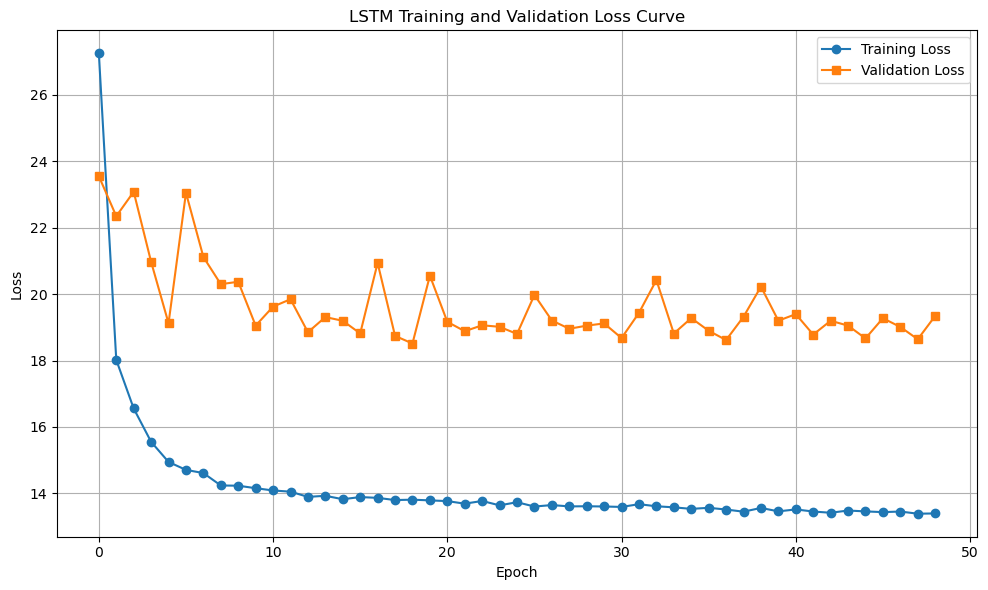

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[17]:


import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import sqrt

# from sklearn import preprocessing
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# import numpy as np
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Dense, LSTM
# from tensorflow.keras.models import load_model, Model

# import datetime
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from matplotlib import pyplot as plt

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM, BatchNormalization
# from keras.layers.convolutional import Conv1D    
# from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D,Bidirectional

# from keras.callbacks import TensorBoard
# from keras.callbacks import ModelCheckpoint
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from tensorflow.keras.optimizers import SGD
# from matplotlib import pyplot

df_14, df_15, df_16, df_17, df_18, df_19, df_20 = [pd.read_csv(fr"../../../Taipei_{i}.csv") 
                                                   for i in range(14,21)]


# In[3]:


def get_X_and_Y(table, station_name = 'Banqiao'):
    table = table[table.SiteEngName =='Banqiao']
    features=table[['AMB_TEMP', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','RAINFALL', 'RH']]
    #print(f'The shape of the input table is {features.shape}')
    data = np.array(features.values.reshape((-1,10*1)))
    timestep=1
    x_build = []
    for i in range(data.shape[0] - timestep - timestep):
        x_build.append(data[i:i+timestep])
    train_x = np.array(x_build)
    #print(f'The shape of the input train_x is {train_x.shape}')


    data = np.array(table['PM2.5'].values.reshape((-1, 1)))
    y_build = []
    for i in range(timestep, data.shape[0] - timestep):
        y_build.append(data[i:i+timestep])
    train_y = np.array(y_build)
    print(f'The shape of the input train_y is {train_y.shape}')
    print('-'*50)
    return (train_x, train_y)

train14_x, train14_y = get_X_and_Y(df_14, station_name = 'Banqiao')
train15_x, train15_y = get_X_and_Y(df_15, station_name = 'Banqiao')
train16_x, train16_y = get_X_and_Y(df_16, station_name = 'Banqiao')
train17_x, train17_y = get_X_and_Y(df_17, station_name = 'Banqiao')
train18_x, train18_y = get_X_and_Y(df_18, station_name = 'Banqiao')
train19_x, train19_y = get_X_and_Y(df_19, station_name = 'Banqiao')
train20_x, train20_y = get_X_and_Y(df_20, station_name = 'Banqiao')


# In[16]:


train_X=np.concatenate((train14_x,train15_x,train16_x,train17_x,train18_x,train19_x),axis=0)
#print(train_X.shape)
train_y=np.concatenate((train14_y,train15_y,train16_y,train17_y,train18_y,train19_y),axis=0)
#print(train_y.shape)
test_X=train20_x;test_y=train20_y
#print(train20_x.shape,train20_y.shape)


from sklearn.model_selection import train_test_split
# create dataset
X, y = test_X,test_y

# split into train test sets
valid_x,test_x,valid_y,test_y = train_test_split(X, y, test_size=0.5)
print(valid_x.shape, valid_y.shape,test_x.shape, test_y.shape)

print("train_X.shape, train_y.shape, test_x.shape, test_y.shape") 
print(train_X.shape, train_y.shape, test_x.shape, test_y.shape) 

####################################
######################################

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Bidirectional, LSTM, concatenate
from tensorflow.keras.models import Model

# Define the input layers
input1 = Input(shape=(train_X.shape[1], train_X.shape[2]))
x1 = Conv1D(filters=100, kernel_size=1, activation='relu')(input1)
x1 = MaxPooling1D(pool_size=1)(x1)
lstm1 = Bidirectional(LSTM(50, return_sequences=True))(x1)
output1 = Dense(50, activation='relu')(lstm1)
out=Dense(1, activation='relu')(output1)
###########################
model = Model(inputs=[input1], outputs=out)

model.compile(loss='mse',optimizer='adam',metrics=['mae'])

model.summary()

# # Compile the model
# model.compile(loss='mse',optimizer='adam',metrics=['mae'])

# # Print model summary
# model.summary()


# In[26]:


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import numpy as np
checkpoint_path = "Banqiao1.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

#Train the model with the new callback
history = model.fit((train_X) ,
                    (train_y), 
                    validation_data=((valid_x),
                                    (valid_y)),
                    epochs =50, batch_size=19, verbose = 2, shuffle = True,
                    callbacks=[cp_callback])


# In[ ]:


model.load_weights(checkpoint_path)


# In[ ]:


scores = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', scores)
predict_ary = model.predict([test_x.astype("float")], batch_size = 190)
print (predict_ary.shape)
print (test_y.shape)
#print (X_valid.shape)
rmse_score20 = np.sqrt(np.mean(np.square(predict_ary - test_y.astype("float"))))
mae_score = np.mean(np.abs(predict_ary - test_y.astype("float")))
#mape_score = mean_absolute_percentage_error(y_valid_c.astype("float"),predict_ary)
#mae2 = mean_absolute_error(predict_ary, validation_Y[:-3])
print('this is rmse ',rmse_score20)
#print('this is mape ',mape_score)
print('this is mae ',mae_score)

y_pred_flat = predict_ary.reshape(-1)
y_true_flat = test_y.astype("float").reshape(-1)

# Calculate metrics
r2 = r2_score(y_true_flat, y_pred_flat)
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)

# In[ ]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# In[ ]:






In [3]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# In[ ]:


NameError: name 'plt' is not defined

The shape of the input train_y is (8728, 16, 1)
--------------------------------------------------
The shape of the input train_y is (8728, 16, 1)
--------------------------------------------------
The shape of the input train_y is (8728, 16, 1)
--------------------------------------------------
The shape of the input train_y is (8728, 16, 1)
--------------------------------------------------
The shape of the input train_y is (8728, 16, 1)
--------------------------------------------------
The shape of the input train_y is (8728, 16, 1)
--------------------------------------------------
The shape of the input train_y is (4292, 16, 1)
--------------------------------------------------
(2146, 16, 10) (2146, 16, 1) (2146, 16, 10) (2146, 16, 1)
train_X.shape, train_y.shape, test_x.shape, test_y.shape
(52368, 16, 10) (52368, 16, 1) (2146, 16, 10) (2146, 16, 1)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 16, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 16, 100)        │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 16, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 16, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,601 (260.16 KB)

 Trainable params: 66,601 (260.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2757/2757 - 34s - 12ms/step - loss: 85.6941 - mae: 6.4972 - val_loss: 52.7080 - val_mae: 5.4618
Epoch 2/100
2757/2757 - 30s - 11ms/step - loss: 73.3908 - mae: 5.9633 - val_loss: 54.8890 - val_mae: 5.5361
Epoch 3/100
2757/2757 - 30s - 11ms/step - loss: 70.0620 - mae: 5.8327 - val_loss: 50.4486 - val_mae: 5.1617
Epoch 4/100
2757/2757 - 30s - 11ms/step - loss: 66.8306 - mae: 5.7053 - val_loss: 64.5815 - val_mae: 5.8351
Epoch 5/100
2757/2757 - 30s - 11ms/step - loss: 63.1134 - mae: 5.5789 - val_loss: 50.9398 - val_mae: 5.1527
Epoch 6/100
2757/2757 - 30s - 11ms/step - loss: 59.0695 - mae: 5.4406 - val_loss: 62.7888 - val_mae: 5.9640
Epoch 7/100
2757/2757 - 29s - 10ms/step - loss: 54.7671 - mae: 5.2817 - val_loss: 62.1454 - val_mae: 5.6647
Epoch 8/100
2757/2757 - 29s - 10ms/step - loss: 51.1421 - mae: 5.1418 - val_loss: 60.3314 - val_mae: 5.4621
Epoch 9/100
2757/2757 - 29s - 10ms/step - loss: 47.4289 - mae: 4.9777 - val_loss: 61.7611 - val_mae: 5.6501
Epoch 10/100
2757/2757 - 28s

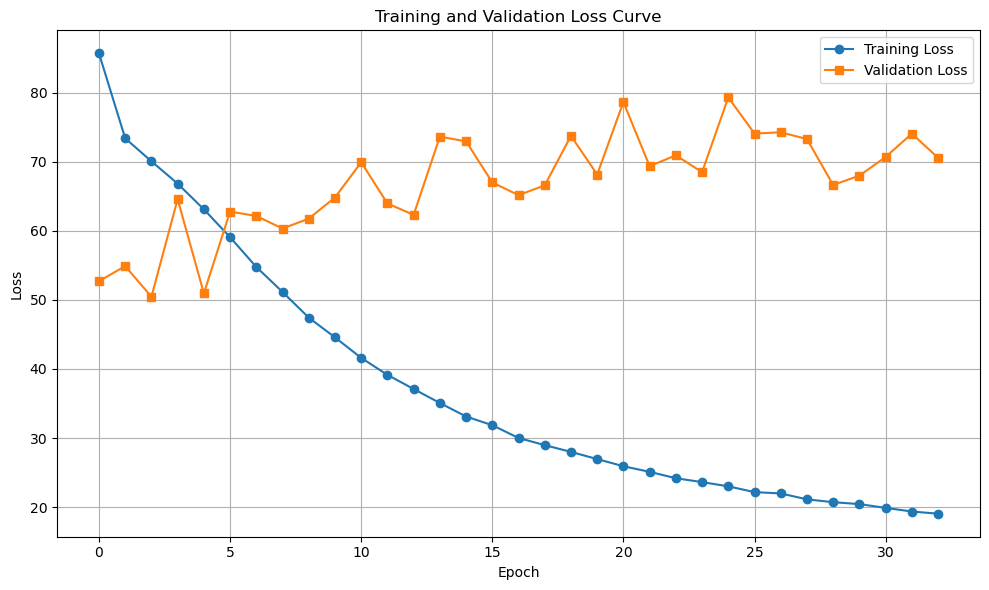

<Figure size 640x480 with 0 Axes>

In [7]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import sqrt

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Bidirectional, LSTM, concatenate
from tensorflow.keras.models import Model
# from sklearn import preprocessing
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# import numpy as np
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Dense, LSTM
# from tensorflow.keras.models import load_model, Model

# import datetime
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from matplotlib import pyplot as plt

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM, BatchNormalization
# from keras.layers.convolutional import Conv1D    
# from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D,Bidirectional

# from keras.callbacks import TensorBoard
# from keras.callbacks import ModelCheckpoint
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from tensorflow.keras.optimizers import SGD
# from matplotlib import pyplot

df_14, df_15, df_16, df_17, df_18, df_19, df_20 = [pd.read_csv(fr"../../../Taipei_{i}.csv") 
                                                   for i in range(14,21)]


# In[3]:


def get_X_and_Y(table, station_name = 'Cailiao'):
    table = table[table.SiteEngName =='Cailiao']
    features=table[['AMB_TEMP', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','RAINFALL', 'RH']]
    #print(f'The shape of the input table is {features.shape}')
    data = np.array(features.values.reshape((-1,10*1)))
    timestep=16
    x_build = []
    for i in range(data.shape[0] - timestep - timestep):
        x_build.append(data[i:i+timestep])
    train_x = np.array(x_build)
    #print(f'The shape of the input train_x is {train_x.shape}')


    data = np.array(table['PM2.5'].values.reshape((-1, 1)))
    y_build = []
    for i in range(timestep, data.shape[0] - timestep):
        y_build.append(data[i:i+timestep])
    train_y = np.array(y_build)
    print(f'The shape of the input train_y is {train_y.shape}')
    print('-'*50)
    return (train_x, train_y)

train14_x, train14_y = get_X_and_Y(df_14, station_name = 'Cailiao')
train15_x, train15_y = get_X_and_Y(df_15, station_name = 'Cailiao')
train16_x, train16_y = get_X_and_Y(df_16, station_name = 'Cailiao')
train17_x, train17_y = get_X_and_Y(df_17, station_name = 'Cailiao')
train18_x, train18_y = get_X_and_Y(df_18, station_name = 'Cailiao')
train19_x, train19_y = get_X_and_Y(df_19, station_name = 'Cailiao')
train20_x, train20_y = get_X_and_Y(df_20, station_name = 'Cailiao')


# In[16]:


train_X=np.concatenate((train14_x,train15_x,train16_x,train17_x,train18_x,train19_x),axis=0)
#print(train_X.shape)
train_y=np.concatenate((train14_y,train15_y,train16_y,train17_y,train18_y,train19_y),axis=0)
#print(train_y.shape)
test_X=train20_x;test_y=train20_y
#print(train20_x.shape,train20_y.shape)


from sklearn.model_selection import train_test_split
# create dataset
X, y = test_X,test_y

# split into train test sets
valid_x,test_x,valid_y,test_y = train_test_split(X, y, test_size=0.5)
print(valid_x.shape, valid_y.shape,test_x.shape, test_y.shape)

print("train_X.shape, train_y.shape, test_x.shape, test_y.shape") 
print(train_X.shape, train_y.shape, test_x.shape, test_y.shape) 

####################################
######################################


# Define the input layers
input1 = Input(shape=(train_X.shape[1], train_X.shape[2]))
x1 = Conv1D(filters=100, kernel_size=1, activation='relu')(input1)
x1 = MaxPooling1D(pool_size=1)(x1)
lstm1 = Bidirectional(LSTM(50, return_sequences=True))(x1)
output1 = Dense(50, activation='relu')(lstm1)
out=Dense(1, activation='relu')(output1)
###########################
model = Model(inputs=[input1], outputs=out)

model.compile(loss='mse',optimizer='adam',metrics=['mae'])

model.summary()

# # Compile the model
# model.compile(loss='mse',optimizer='adam',metrics=['mae'])

# # Print model summary
# model.summary()


# In[2]:


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import numpy as np
checkpoint_path = "Cailiao16.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

#Train the model with the new callback
history = model.fit((train_X) ,
                    (train_y), 
                    validation_data=((valid_x),
                                    (valid_y)),
                    epochs =100, batch_size=19, verbose = 2, shuffle = True,
                    callbacks=[cp_callback])


# In[ ]:


model.load_weights(checkpoint_path)


# In[ ]:


scores = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', scores)
predict_ary = model.predict([test_x.astype("float")], batch_size = 190)
print (predict_ary.shape)
print (test_y.shape)
#print (X_valid.shape)
rmse_score20 = np.sqrt(np.mean(np.square(predict_ary - test_y.astype("float"))))
mae_score = np.mean(np.abs(predict_ary - test_y.astype("float")))
#mape_score = mean_absolute_percentage_error(y_valid_c.astype("float"),predict_ary)
#mae2 = mean_absolute_error(predict_ary, validation_Y[:-3])
print('this is rmse ',rmse_score20)
#print('this is mape ',mape_score)
print('this is mae ',mae_score)

y_pred_flat = predict_ary.reshape(-1)
y_true_flat = test_y.astype("float").reshape(-1)

# Calculate metrics
r2 = r2_score(y_true_flat, y_pred_flat)
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)
print('this is r2 ',r2)
print('this is mape ',mape)
# In[ ]:






plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('cnn16.png')



# In[5]:





# In[ ]:






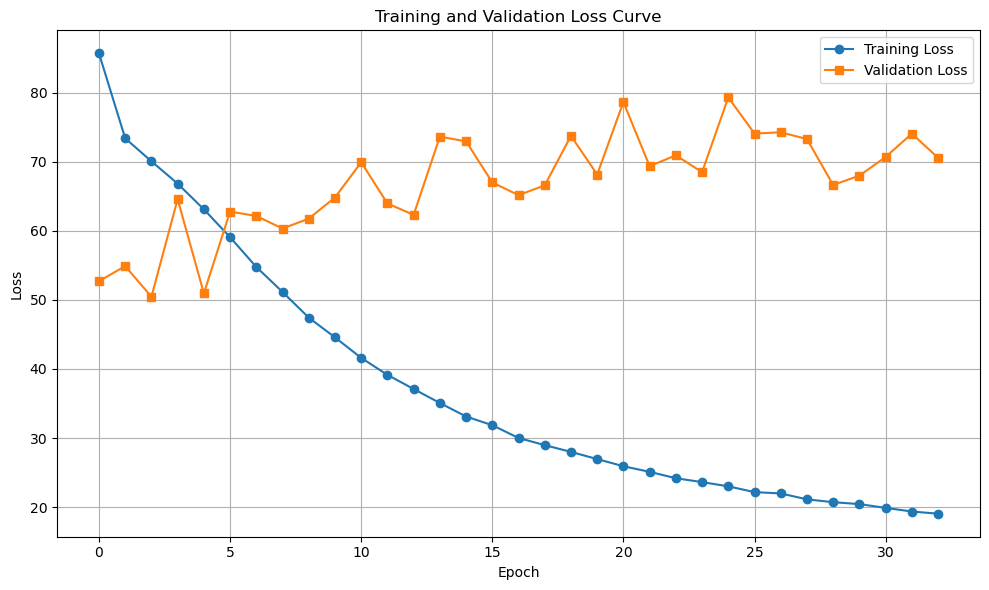

<Figure size 640x480 with 0 Axes>

In [10]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('CNN_curve.png', dpi=300)  # You can change the filename and DPI as needed
plt.show()
# In[ ]:

In [11]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import sqrt

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Bidirectional, LSTM, concatenate
from tensorflow.keras.models import Model
# from sklearn import preprocessing
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# import numpy as np
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Dense, LSTM
# from tensorflow.keras.models import load_model, Model

# import datetime
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from matplotlib import pyplot as plt

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM, BatchNormalization
# from keras.layers.convolutional import Conv1D    
# from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D,Bidirectional

# from keras.callbacks import TensorBoard
# from keras.callbacks import ModelCheckpoint
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from tensorflow.keras.optimizers import SGD
# from matplotlib import pyplot

df_14, df_15, df_16, df_17, df_18, df_19, df_20 = [pd.read_csv(fr"../../../Taipei_{i}.csv") 
                                                   for i in range(14,21)]


# In[3]:


def get_X_and_Y(table, station_name = 'Guting'):
    table = table[table.SiteEngName =='Guting']
    features=table[['AMB_TEMP', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','RAINFALL', 'RH']]
    #print(f'The shape of the input table is {features.shape}')
    data = np.array(features.values.reshape((-1,10*1)))
    timestep=40
    x_build = []
    for i in range(data.shape[0] - timestep - timestep):
        x_build.append(data[i:i+timestep])
    train_x = np.array(x_build)
    #print(f'The shape of the input train_x is {train_x.shape}')


    data = np.array(table['PM2.5'].values.reshape((-1, 1)))
    y_build = []
    for i in range(timestep, data.shape[0] - timestep):
        y_build.append(data[i:i+timestep])
    train_y = np.array(y_build)
    print(f'The shape of the input train_y is {train_y.shape}')
    print('-'*50)
    return (train_x, train_y)

train14_x, train14_y = get_X_and_Y(df_14, station_name = 'Guting')
train15_x, train15_y = get_X_and_Y(df_15, station_name = 'Guting')
train16_x, train16_y = get_X_and_Y(df_16, station_name = 'Guting')
train17_x, train17_y = get_X_and_Y(df_17, station_name = 'Guting')
train18_x, train18_y = get_X_and_Y(df_18, station_name = 'Guting')
train19_x, train19_y = get_X_and_Y(df_19, station_name = 'Guting')
train20_x, train20_y = get_X_and_Y(df_20, station_name = 'Guting')


# In[16]:


train_X=np.concatenate((train14_x,train15_x,train16_x,train17_x,train18_x,train19_x),axis=0)
#print(train_X.shape)
train_y=np.concatenate((train14_y,train15_y,train16_y,train17_y,train18_y,train19_y),axis=0)
#print(train_y.shape)
test_X=train20_x;test_y=train20_y
#print(train20_x.shape,train20_y.shape)


from sklearn.model_selection import train_test_split
# create dataset
X, y = test_X,test_y

# split into train test sets
valid_x,test_x,valid_y,test_y = train_test_split(X, y, test_size=0.5)
print(valid_x.shape, valid_y.shape,test_x.shape, test_y.shape)

print("train_X.shape, train_y.shape, test_x.shape, test_y.shape") 
print(train_X.shape, train_y.shape, test_x.shape, test_y.shape) 

####################################
######################################


# Define the input layers
input1 = Input(shape=(train_X.shape[1], train_X.shape[2]))
x1 = Conv1D(filters=100, kernel_size=1, activation='relu')(input1)
x1 = MaxPooling1D(pool_size=1)(x1)
lstm1 = Bidirectional(LSTM(50, return_sequences=True))(x1)
output1 = Dense(50, activation='relu')(lstm1)
out=Dense(1, activation='relu')(output1)
###########################
model = Model(inputs=[input1], outputs=out)

model.compile(loss='mse',optimizer='adam',metrics=['mae'])

model.summary()

# # Compile the model
# model.compile(loss='mse',optimizer='adam',metrics=['mae'])

# # Print model summary
# model.summary()


# In[2]:


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import numpy as np
checkpoint_path = "Guting40ddd.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

#Train the model with the new callback
history = model.fit((train_X) ,
                    (train_y), 
                    validation_data=((valid_x),
                                    (valid_y)),
                    epochs =50, batch_size=19, verbose = 2, shuffle = True,
                    callbacks=[cp_callback])


# In[ ]:


model.load_weights(checkpoint_path)


# In[ ]:


scores = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', scores)
print('Test accuracy:', scores)
predict_ary = model.predict([test_x.astype("float")], batch_size = 190)
print (predict_ary.shape)
print (test_y.shape)
#print (X_valid.shape)
rmse_score20 = np.sqrt(np.mean(np.square(predict_ary - test_y.astype("float"))))
mae_score = np.mean(np.abs(predict_ary - test_y.astype("float")))
#mape_score = mean_absolute_percentage_error(y_valid_c.astype("float"),predict_ary)
#mae2 = mean_absolute_error(predict_ary, validation_Y[:-3])
print('this is rmse ',rmse_score20)
#print('this is mape ',mape_score)
print('this is mae ',mae_score)

y_pred_flat = predict_ary.reshape(-1)
y_true_flat = test_y.astype("float").reshape(-1)

# Calculate metrics
r2 = r2_score(y_true_flat, y_pred_flat)
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)
print('this is r2 ',r2)
print('this is mape ',mape)
# In[ ]:


# In[3]:



plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('CNN_curve.png', dpi=300)  # You can change the filename and DPI as needed
plt.show()
# In[ ]:

# In[ ]:





# In[ ]:






The shape of the input train_y is (8680, 40, 1)
--------------------------------------------------
The shape of the input train_y is (8680, 40, 1)
--------------------------------------------------
The shape of the input train_y is (8680, 40, 1)
--------------------------------------------------
The shape of the input train_y is (8680, 40, 1)
--------------------------------------------------
The shape of the input train_y is (8680, 40, 1)
--------------------------------------------------
The shape of the input train_y is (8680, 40, 1)
--------------------------------------------------
The shape of the input train_y is (4244, 40, 1)
--------------------------------------------------
(2122, 40, 10) (2122, 40, 1) (2122, 40, 10) (2122, 40, 1)
train_X.shape, train_y.shape, test_x.shape, test_y.shape
(52080, 40, 10) (52080, 40, 1) (2122, 40, 10) (2122, 40, 1)


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 40, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 40, 100)        │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 40, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 40, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 40, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 40, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,601 (260.16 KB)

 Trainable params: 66,601 (260.16 KB)

 Non-trainable params: 0 (0.00 B)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=Guting40ddd.h5